In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

Statistical analysis on average ratings

In [2]:
# method that calculates the total variation distance between two histograms
def calculate_tvd(hist1, hist2):
    # Normalize histograms to sum to 1 (convert to probability distributions)
    hist1 = hist1 / np.sum(hist1)
    hist2 = hist2 / np.sum(hist2)
    
    # Calculate the total variation distance
    tvd = 0.5 * np.sum(np.abs(hist1 - hist2))
    return tvd

calculating total variation distance

In [21]:
# get data
# year = "2018"
# file_a = 'Part_1_Company_Testing/pairwise_testing_against_same_20/25_A_List_Averages.csv'
# file_b = 'Part_1_Company_Testing/pairwise_testing_against_same_20/25_Non_A_List_Averages.csv'

file_a = "Part_1_Company_Testing/147_147_Companies/147_A_List_Pairwise_Averages.csv"
file_b = "Part_1_Company_Testing/147_147_Companies/147_Non_A_List_Pairwise_Averages.csv"

df_a = pd.read_csv(file_a)
df_b = pd.read_csv(file_b)

# get histograms
# # bins = [1,1.5,2,2.5,3,3.5,4,4.5,5]
# bins=[10,20,30,40,50,60,70,80,90,100]

bins = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]

hist1,_ = np.histogram(df_a["Weighted_Average"], bins = bins)
hist2,_ = np.histogram(df_b["Weighted_Average"], bins = bins)

tvd = calculate_tvd(hist1, hist2)
print("TVD = ", tvd)

TVD =  0.06666666666666665


calculating TVD scaled

In [16]:
import pandas as pd
import numpy as np

# Define the function to calculate TVD
def calculate_tvd(hist1, hist2):
    # Normalize histograms to convert them into probability distributions
    hist1 = hist1 / np.sum(hist1)
    hist2 = hist2 / np.sum(hist2)
    
    # Calculate Total Variation Distance (TVD)
    tvd = 0.5 * np.sum(np.abs(hist1 - hist2))
    return tvd

# File paths for A List and Non A List data
file_a = "Part_1_Company_Testing/147_147_Companies_No_Explanation/Averages_147_A_List.csv"
file_b = "Part_1_Company_Testing/147_147_Companies_No_Explanation/Averages_147_Non_A_List.csv"

# Load data
df_a = pd.read_csv(file_a)
df_b = pd.read_csv(file_b)

# Convert Weighted_Average columns to numeric and handle errors
df_a['Average_Log_Probability'] = pd.to_numeric(df_a['Average_Log_Probability'], errors='coerce') / 100
df_b['Average_Log_Probability'] = pd.to_numeric(df_b['Average_Log_Probability'], errors='coerce') / 100

# Define the bins (scaled from 0 to 1)
bins = [0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1]

# Get histograms
hist1, _ = np.histogram(df_a["Average_Log_Probability"].dropna(), bins=bins)
hist2, _ = np.histogram(df_b["Average_Log_Probability"].dropna(), bins=bins)

# Calculate TVD
tvd = calculate_tvd(hist1, hist2)

# Print the TVD
print("TVD = ", tvd)


TVD =  0.36862244897959184


Calculate KS statistic and P-value: Kolmogorov-Smirnov (KS) test

KS Statistic: 0.3774092970521542
P-value: 8.320389984048573e-10


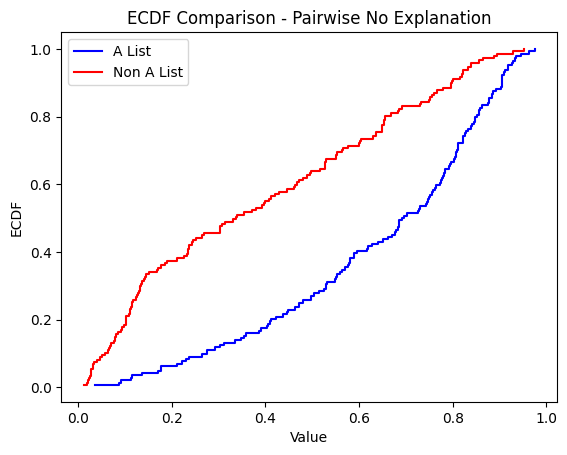

In [17]:
ks_statistic, p_value = stats.ks_2samp(df_a["Average_Log_Probability"], df_b["Average_Log_Probability"])
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

# Optional: Plot ECDFs based on raw data
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    x = np.sort(data)
    n = len(data)
    y = np.arange(1, n+1) / n
    return x, y

# Get ECDFs for both datasets
x1, y1 = ecdf(df_a["Average_Log_Probability"])
x2, y2 = ecdf(df_b["Average_Log_Probability"])

plt.step(x1, y1, label='A List', where='post', color = 'blue')
plt.step(x2, y2, label='Non A List', where='post', color = 'red')
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.title('ECDF Comparison - Pairwise No Explanation')
plt.legend()
plt.show()

Calculate Bhattacharyya distance

In [29]:
def bhattacharyya_distance(hist1, hist2):
    
    # Ensure histograms are normalized (i.e., they sum to 1)
    hist1 = hist1 / np.sum(hist1)
    hist2 = hist2 / np.sum(hist2)
    
    # Calculate the Bhattacharyya coefficient
    bc = np.sum(np.sqrt(hist1 * hist2))
    
    # Calculate the Bhattacharyya distance
    distance = -np.log(bc)
    
    return distance

In [30]:
# get data
# year = "2022"
# folder_name = "50_a_vs_non_a_with_example"
# file_a = "rating_results/" + folder_name + "/average_ratings/a_list_average_ratings_" + year
# file_b = "rating_results/" + folder_name + "/average_ratings/non_a_list_average_ratings_" + year

# df_a = pd.read_csv(file_a)
# df_b = pd.read_csv(file_b)

# get histograms
bins=[10,20,30,40,50,60,70,80,90,100]
hist1,_ = np.histogram(df_a["Average"], bins = bins)
hist2,_ = np.histogram(df_b["Average"], bins = bins)

distance = bhattacharyya_distance(hist1, hist2)
print("bhattacharyya distance = ", distance)

bhattacharyya distance =  0.13569750079284293
